# Import LagrangianTraj_MF package

In [1]:
# Import LagrangianTraj_MF 
%run LagrangianTraj_MF.ipynb

# Model data

This part needs to be adapted depending on your model files.
 - For ARPEGE: please, use different grib files, containing the entire dataset (u,v,w,etc) for each time steps. 

#### Dimension definition

In [2]:
# Name of longitude, latitude, pressure dimensions in the model file
list_coord=['longitude','latitude','isobaricInhPa'] 

# Initial time of forecast
Initial_time_model='2016-10-01T12:00:00.000000000'

# End of forecast
End_time_model='2016-10-02T12:00:00.000000000'

# Format of time : %Y:year, %m:month,%d:day, %H:hour, %M:minute, %S:second
time_format='%Y-%m-%dT%H:%M:%S.000000000'

# Time between two model outputs (in hour)
dt_modelOutput =0.25 

# List of model time (no need to be modified)
YYMMDDHH_model=TimeList(Initial_time_model, 1 , 
                        dt_modelOutput, time_format, 
                        time_end=End_time_model,
                        format_output=time_format)

#### Define model files

In [3]:
# Root where all model files are stored
root_exp="/home/wimmerm/NAWDEX/Data/fc_000/"

# File names (list of files)
file_names=[root_exp + "GRIDHSTGLOB05+" +str(i).zfill(4) for i in range(0,195,2)]

# File type
file_type='grib'

#### Read model data

In [4]:
# Open file (do not modify)
file_data,LON_model, LAT_model, PRE_model,list_coord=read_model(root_exp,file_names, 'grib',list_coord,
                                                    longitude_slice=(-70,25), latitude_slice=(30,80),
                                                    grib_selection={'typeOfLevel': 'isobaricInhPa'})


# -------------------------------------------------------------------------------------------------------
#                                     COMMENT THE FOLLOWING LINES 
#                  ONLY IF W IS ON THE SAME PRESSURE LEVELS THAN THE OTHER VARIABLES
# -------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------
# Solution #1: Delete the pressure level on which w does not exist
# -------------------------------------------------------------------------------------------------------
# For all variables, delete vertical levels that doesn't exist in w
#file_data11=file_data.isel(pressure=slice(0,2,1))
#file_data12=file_data.isel(pressure=slice(3,21,1))
#file_data1= xr.concat([file_data11,file_data12], dim='pressure')
#file_data2,LON_model, LAT_model, PRE_modelW=read_model(root_exp,file_names, 'grib',list_coord,
#                                                    longitude_slice=(-70,10), latitude_slice=(30,80),
#                                                    grib_selection={'shortName': 'w'})

# -------------------------------------------------------------------------------------------------------
# Solution #2: Consider w on another pressure dimension
# -------------------------------------------------------------------------------------------------------
list_coord=['longitude','latitude','isobaricInhPa']  
file_data2,LON_model, LAT_model, PRE_modelW, list_coord=read_model(root_exp,file_names, file_type,list_coord,
                                                    longitude_slice=(-70,25), latitude_slice=(30,80),
                                                    grib_selection={'shortName': 'w'})
list_coord+=['pressure2']
file_data2=file_data2.rename_dims({'pressure':'pressure2'})
file_data2=file_data2.rename({'pressure':'pressure2'})

# -------------------------------------------------------------------------------------------------------
# Merge all variable in one xarray
# -------------------------------------------------------------------------------------------------------
file_data= xr.merge([file_data, file_data2])


skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,  650.,
        600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,
        150.,  100.,   50.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  900.,  850.,  800.,  750.,  700.,  650.,  600.,
        550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,  150.,
        100.,   50.]))
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future v

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3

skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,  650.,
        600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,
        150.,  100.,   50.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  900.,  850.,  800.,  750.,  700.,  650.,  600.,
        550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,  150.,
        100.,   50.]))
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future v

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3

skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,  650.,
        600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,
        150.,  100.,   50.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  900.,  850.,  800.,  750.,  700.,  650.,  600.,
        550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,  150.,
        100.,   50.]))
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future v

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3

skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,  650.,
        600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,
        150.,  100.,   50.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  900.,  850.,  800.,  750.,  700.,  650.,  600.,
        550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,  150.,
        100.,   50.]))
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future v

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3

skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,  650.,
        600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,
        150.,  100.,   50.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  900.,  850.,  800.,  750.,  700.,  650.,  600.,
        550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,  150.,
        100.,   50.]))
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future v

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3

skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,  650.,
        600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,
        150.,  100.,   50.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  900.,  850.,  800.,  750.,  700.,  650.,  600.,
        550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,  150.,
        100.,   50.]))
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future v

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3

skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,  650.,
        600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,
        150.,  100.,   50.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  900.,  850.,  800.,  750.,  700.,  650.,  600.,
        550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,  150.,
        100.,   50.]))
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future v

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3

skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,  650.,
        600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,
        150.,  100.,   50.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  900.,  850.,  800.,  750.,  700.,  650.,  600.,
        550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,  150.,
        100.,   50.]))
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future v

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3

skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,  650.,
        600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,
        150.,  100.,   50.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  950.,  900.,  850.,  800.,  750.,  700.,  650.,  600.,
        550.,  500.,  450.,  400.,  350.,  300.,  250.,  200.,  150.,
        100.,   50.]))
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future v

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timede

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timede

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timede

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timede

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timede

/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/wimmerm/venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timede

# Trajectories definition

Define here the characteristic of the trajectories

In [5]:
# Time resolution of Lagrangian trajectories (in hour)
dt_traj=0.125 

# type of Trajectories
BACKWARD=True

# Duration of trajectories (in hours)
Trajectories_duration=24

#Initial and final time of trajetories
Initial_time_traj='2016-10-02T12:00:00.000000000'
End_time_traj='2016-10-01T12:00:00.000000000'

# Time step of initial time of trajectories (no need to be modified)
i_time_traj=GetTimeStep(YYMMDDHH_model,time_wanted=Initial_time_traj)

# Seeding Points

### Create seeding points

Various seedings are suggested. 

You can define the limits (included), as well as the resolution or the number of seeding points, for each dimension (longitude/lon, latitude/lat and pressure/pre) and the function GenerateSeeds outputs a list of longitude, latitude and pressure for each seeding point.

Warning: lat_End > lat_Init, lon_End > lon_Init, pre_End > pre_Init

Exemple of use:
To generate seeding points in a rectangle area spreading from 136°E to 148°E and from 63°S to 52°S and from 500hPa to 950hPa, with a resolution of 0.1° and 50hPa:

        lon_Init=136, lon_End=148, lon_Resolution=0.1, lat_Init=-63, lat_End=-51, lat_Resolution=0.1, pre_Init=50000, pre_End=95000, pre_Resolution=5000
        
or to generate 50 seeding points on 10 levels along a cross-section from 136°E to 148°E and from 63°S to 52°S and from 500hPa to 950hPa:
    
        lon_Init=136, lon_End=148, lon_Number=50, lat_Init=-63, lat_End=-51, lat_Number=50, pre_Init=50000, pre_End=95000, pre_Number=10
        
or to generate 50 seeding points on 10 levels along a cross-section from 136°E to 148°E and from 63°S to 52°S and from 500hPa to 950hPa with a resolution of 0.1° and 50hPa:
    
        lon_Init=136, lon_Resolution=0.1, lon_Number=50, lat_Init=-63, lat_Resolution=0.1, lat_Number=50, pre_Init=50000, pre_Resolution=5000, pre_Number=10
    
Notify that longitude/latitude are in degrees while pressure is in Pa.

By default, if you choose a varying longitudes and latitudes, the resulting seeding points will be in a rectangular pattern. If you want a line shape (i.e. a vertical cross-section), please set CV=True.

Warning: the number of seeding points in longitude and latitude must be the same !

#### Give limits of seedings and resolution

In [ ]:
LON_seed, LAT_seed, PRE_seed, nb_traj, nb_lon, nb_lat, nb_pre=GenerateSeeds(
                                  lon_Init=125,   lon_End=150,   lon_Resolution=0.1, 
                                  lat_Init=-68,   lat_End=-51,   lat_Resolution=0.1,
                                  pre_Init=50000, pre_End=95000, pre_Resolution=5000,
                                  CV=False)

#### Give limits of seedings and number of seeding points

In [ ]:
LON_seed, LAT_seed, PRE_seed, nb_traj, nb_lon, nb_lat, nb_pre=GenerateSeeds(
                                  lon_Init=125,   lon_End=150,   lon_Number=251, 
                                  lat_Init=-68,   lat_End=-51,   lat_Number=171,
                                  pre_Init=50000, pre_End=95000, pre_Number=10,
                                  CV=False)

#### Give initial seeding points and resolution and number of seeding points

In [ ]:
LON_seed, LAT_seed, PRE_seed, nb_traj, nb_lon, nb_lat, nb_pre=GenerateSeeds(
                                  lon_Init=125,   lon_Resolution=0.1,  lon_Number=251, 
                                  lat_Init=-68,   lat_Resolution=0.1,  lat_Number=171,
                                  pre_Init=50000, pre_Resolution=95000, pre_Number=10,
                                  CV=False)

#### Example for NAWDEX 

In [6]:
LON_seed, LAT_seed, PRE_seed, nb_traj, nb_lon, nb_lat, nb_pre=GenerateSeeds(
                                  lon_Init=-19,   lon_Resolution=-0.395, lon_Number=20,
                                  lat_Init=58.6,  lat_Resolution=-0.03,  lat_Number=20, 
                                  pre_Init=97500, pre_Resolution=-1250,  pre_Number=63, 
                                  CV=True)

Seeding along a cross-section
1260 trajectories seeds generated


### Map of Seeding

The following code plots the Relative Humidity (shading) and Wind speed (arrow) at 850hPa and at the initial time of trajectories, in order to verify that the seeding is correct.

Please, adapt according to your need.

/home/wimmerm/venv/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


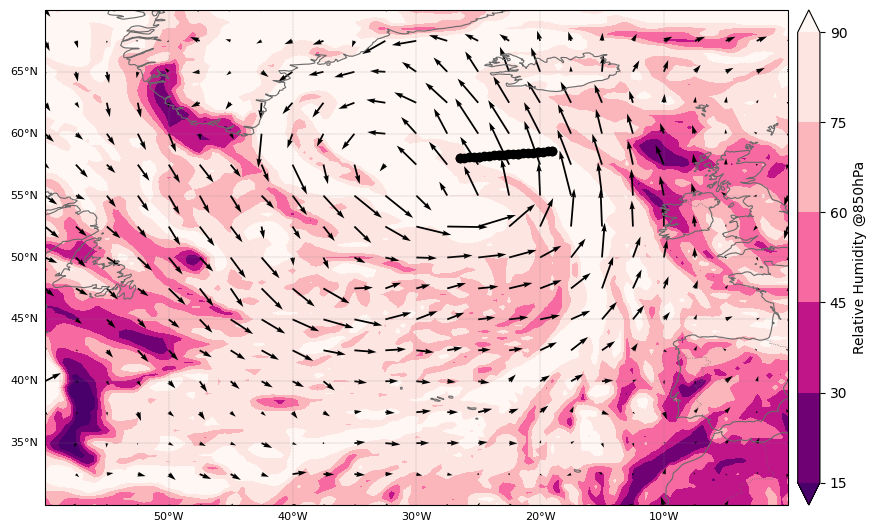

In [9]:
# Create Figure: please adapt the limits of longitude and latitude of the plot
fig, ax=TrajMap(lon_min=-60, lon_max=0, lat_min=30,lat_max=70)

# Get index of time step which is the initial time step of trajectories (Initial_time_traj)
# If need to change this part, please, consider that "time_wanted" must be 
# in the same time format that "YYMMDDHH_model" (so in the format "time_format" defined above)
i_time=GetTimeStep(YYMMDDHH_model,time_wanted=Initial_time_traj)

# Get index of pressure level equals to 85000 Pa
i_lev=GetPressureLevel(PRE_model,levelInPa=85000)

# Define the plotted variable as shading
# Name in the xArrayDataset
i_var='r'
# Title in the colorbar
colorbar_label='Relative Humidity @'+str(int(PRE_model[i_lev]/100))+'hPa'
# Colorbar definition (please refer to https://matplotlib.org/stable/gallery/color/colormap_reference.html)
cmap='RdPu_r'
# Plot relative humidity as shading
TrajMap_AddField(ax,colorbar_label, 
                 LON_model, LAT_model, 
                 file_data.variables[i_var].data[i_time,i_lev,:,:], 
                 cmap)

# Plot of wind speed in arrows 
TrajMap_AddArrow(ax,LON_model, LAT_model, 
                 file_data.variables['u'][i_time,i_lev,:,:],
                 file_data.variables['v'][i_time,i_lev,:,:],
                 resol=5) # display only every 5 grid points
                           # To see arrows at all grid points, set resol at 1 

# Plot of seeding points
TrajMap_AddSeedingPoint(ax,
                        LON_seed, LAT_seed,
                        resol=50) # print only every 50 seeding points 
                                  # To see all seedings points, set resol at 1


### Define variables name to interpolate along the trajectories (u,v,w are mandatory)

In [7]:
# Variables names used for advection (change name according to your file if needed)
list_var_advec=['u','v','w']

# Names of interpolated variables in your files ('rh, 't', ... )
list_var=['r','t','q','pv']

### Interpolation of variables at initial time of trajectories

In [8]:
# Create intial values of trajectories (do not modified)
Traj_init=TrajInitialize(nb_traj,
                   LON_seed, LAT_seed, PRE_seed, 
                   list_coord, list_var_advec, list_var,
                   file_data, i_time_traj,
                   LON_model,LAT_model,PRE_model,PRE_modelW=PRE_modelW
                   )

# Delete seeding points that do not fullfill a criterion

#### Criterion defintion and application to trajectories seeding (to delete unwanted trajectories)

Adapt this part according to your criterion

In [ ]:
# Criterion to apply
crit=Traj_init['rh']<32 #%
crit2=Traj_init['pressure']>=85000 #Pa
crit3=Traj_init['pressure']<=90000

# Apply criterion (do not modified)
Traj_init, LON_seed, LAT_seed, PRE_seed, nb_traj = ApplyCriterion([crit, crit2, crit3], Traj_init,list_coord,list_var+list_var_advec)

#### Plot at each pressure level to verify the criterion does really select the wanted area

In [ ]:
# Name in the xArrayDataset
i_var='rh'
# Colorbar definition (please refer to https://matplotlib.org/stable/gallery/color/colormap_reference.html)
cmap='RdPu_r'

# Loop according to pressure level
for num_plev,i_plev in enumerate(PRE_model):
    
    # Title in the colorbar
    colorbar_label='Relative Humidity @'+str(int(i_plev/100))+'hPa'
    
    # Create Figure: please adapt the limits of longitude and latitude of the plot
    fig, ax=TrajMap(lon_min=-60, lon_max=0, lat_min=30,lat_max=70)
    
    # Plot relative humidity as shading
    TrajMap_AddField(ax,colorbar_label,
                     LON_model, LAT_model,
                     file_data.variables[i_var].data[i_time,num_plev,:,:],
                     cmap)
    
    # if pressure level appears in the seeding, plot the seeding points at this level
    crit_horiz=Traj_init['pressure']==i_plev
    if np.any(crit_horiz):
        TrajMap_AddSeedingPoint(ax,
                                Traj_init['longitude'][crit_horiz],
                                Traj_init['latitude'][crit_horiz],
                                resol=100) # print only every 100 seeding points 
                                           # To see all seedings points, set resol at 1

# Trajectories Computation

Trajectories are computed here. Please, be patient.

In [10]:
Traj=TrajCompute(
                Initial_time_traj,End_time_traj,dt_traj,time_format,
                dt_modelOutput,Trajectories_duration,nb_traj,LON_seed, LAT_seed, PRE_seed,
                list_coord, list_var_advec, list_var, file_data, YYMMDDHH_model,
                LON_model,LAT_model,PRE_model,PRE_modelW
                )

Trajectories calculation: 
	 time step :  192 0 2016-10-02T12:00:00.000000000
	 time step :  190 2 2016-10-02T11:45:00.000000000
	 time step :  188 4 2016-10-02T11:30:00.000000000
	 time step :  186 6 2016-10-02T11:15:00.000000000
	 time step :  184 8 2016-10-02T11:00:00.000000000
	 time step :  182 10 2016-10-02T10:45:00.000000000
	 time step :  180 12 2016-10-02T10:30:00.000000000
	 time step :  178 14 2016-10-02T10:15:00.000000000
	 time step :  176 16 2016-10-02T10:00:00.000000000
	 time step :  174 18 2016-10-02T09:45:00.000000000
	 time step :  172 20 2016-10-02T09:30:00.000000000
	 time step :  170 22 2016-10-02T09:15:00.000000000
	 time step :  168 24 2016-10-02T09:00:00.000000000
	 time step :  166 26 2016-10-02T08:45:00.000000000
	 time step :  164 28 2016-10-02T08:30:00.000000000
	 time step :  162 30 2016-10-02T08:15:00.000000000
	 time step :  160 32 2016-10-02T08:00:00.000000000
	 time step :  158 34 2016-10-02T07:45:00.000000000
	 time step :  156 36 2016-10-02T07:30:00.

# Plot of Trajectories

Trajectories are ploted here. Please, be patient too. You can adapt the code to plot other variable along the trajectories

/home/wimmerm/venv/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Trajectories plot: ok


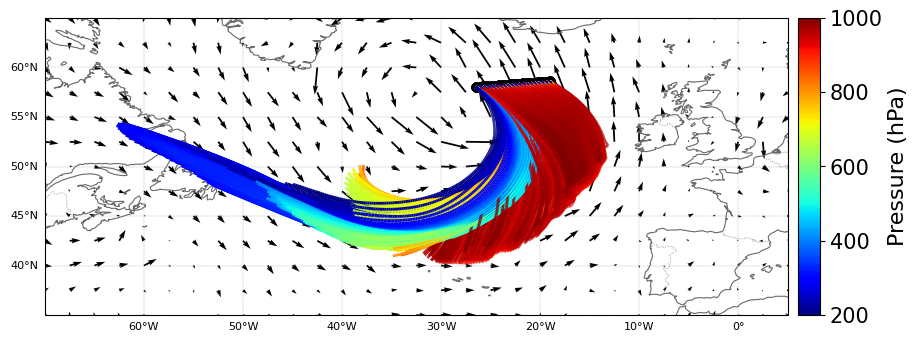

In [12]:
# Create Figure: please adapt the limits of longitude and latitude of the plot
fig, ax=TrajMap(lon_min=-70, lon_max=5, lat_min=35,lat_max=65)

# Get index of pressure level equals to 85000 Pa
i_lev=GetPressureLevel(PRE_model,levelInPa=85000)

# Plot of wind speed in arrows 
TrajMap_AddArrow(ax,LON_model, LAT_model, 
                 file_data.u[i_time,i_lev,:,:],
                 file_data.v[i_time,i_lev,:,:],
                 resol=5)

# Plot of seeding points
TrajMap_AddSeedingPoint(ax, LON_seed, LAT_seed, resol=1) # print every 1000 seeding points 

# Plot trajectories with pressure in color
TrajMap_AddTrajectories(fig=fig, ax=ax,
                        LON_traj=Traj['longitude'],
                        LAT_traj=Traj['latitude'],
                        VAR_traj=Traj['pressure'],
                        name_VAR='Pressure',
                        unit_VAR='hPa')
